In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sktime.forecasting.arima import AutoARIMA
import pmdarima as pm  


Bad key text.latex.preview in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

In [2]:
data = pd.read_csv('stock.csv')  
train_size = int(len(data) * 0.9)  
train_data = data[:train_size]  
test_data = data[train_size:]  

In [3]:
# 创建时间序列  
time_series = pd.Series(data['OLHC'].values, index=pd.to_datetime(data['date']))  
  
# 使用AUTOARIMA选择参数  
model = pm.auto_arima(time_series)  
  
# 输出最佳模型的参数  
print(model.order)  

(0, 1, 1)


In [4]:
train_dates = pd.to_datetime(train_data['date'])  
train_olhc = train_data['OLHC']  
  
test_dates = pd.to_datetime(test_data['date'])  
test_olhc = test_data['OLHC']  

In [5]:
from statsmodels.tsa.arima.model import ARIMA  
model = ARIMA(train_olhc, order=(0,1,1))  # 根据需要调整ARIMA模型的阶数  
model_fit = model.fit()  

In [6]:
predictions = model_fit.predict(start=len(train_olhc), end=len(train_olhc) + len(test_olhc) - 1)  

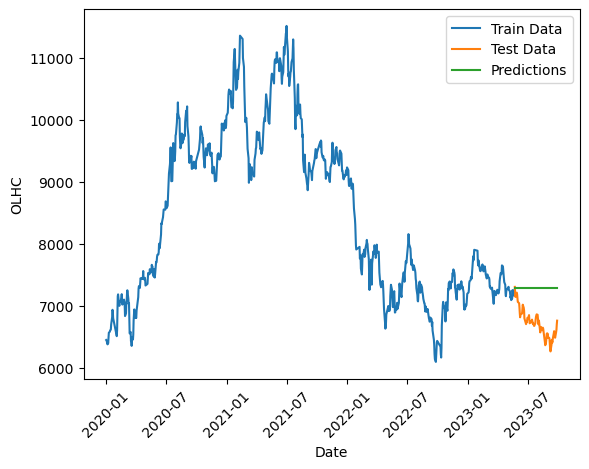

In [7]:
# 绘制训练数据  
plt.plot(train_dates, train_olhc, label='Train Data')  
  
# 绘制测试数据  
plt.plot(test_dates, test_olhc, label='Test Data')  
  
# 绘制预测值  
plt.plot(test_dates, predictions, label='Predictions')  
  
# 添加图例和标签  
plt.legend()  
plt.xlabel('Date')  
plt.ylabel('OLHC')  
 # 旋转x轴标签，以便更好地显示日期  
plt.xticks(rotation=45)   
# 显示图形  
plt.show()  